# Sentiment Analysis with Convolutional Neural Network (CNN) Model
- A CNN is a class of artificial neural network that uses convolutional layers to filter inputs for useful information.
- The convolution operation involves combining input data (feature map) with a convolution kernel (filter) to form a transformed feature map.
- Convolutional networks are composed of an input layer, an output layer, and one or more hidden layers.
- A convolutional network is different than a regular neural network in that the neurons in its layers are arranged in three dimensions (width, height, and depth dimensions). This allows the CNN to transform an input volume in three dimensions to an output volume. The hidden layers are a combination of convolution layers, pooling layers, normalization layers, and fully connected layers.
- A basic configuration of CNN is shown in the figure below:(the picture is from: https://developer.nvidia.com/sites/default/files/pictures/2018/convolutional_neural_network.png
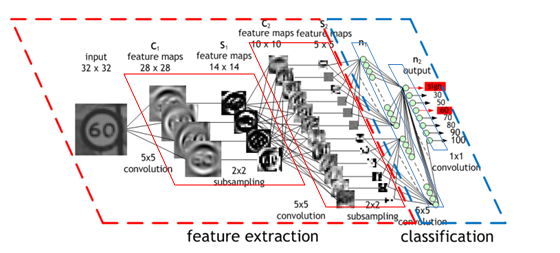
- In the above figure, an input image of a traffic sign is filtered by 4 5×5 convolutional kernels which create 4 feature maps, these feature maps are subsampled by max pooling. The next layer applies 10 5×5 convolutional kernels to these subsampled images and again we pool the feature maps. The final layer is a fully connected layer where all generated features are combined and used in the classifier (essentially logistic regression).
- We can treat text as a one-dimensional image, so that we can use one-dimensional convolutional neural networks to capture associations between adjacent words for sentiment analysis in our case.

In [1]:
# Importing the basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

## Importing the preprocessed dataset

In [2]:
data = pd.read_csv('imdb_data.csv')
data

,review,sentiment
0,one reviewers mention watch 1 oz episode youll...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically theres family little boy jake think ...,negative
4,petter matteis love time money visually stun f...,positive
...,...,...
49995,think movie right good job wasnt creative orig...,positive
49996,bad plot bad dialogue bad act idiotic direct a...,negative
49997,catholic teach parochial elementary school nun...,negative
49998,im go disagree previous comment side maltin on...,negative


In [3]:
# Extracting list of all reviews we have in our dataset
reviews = data.review
reviews

0        one reviewers mention watch 1 oz episode youll...
1        wonderful little production film technique una...
2        think wonderful way spend time hot summer week...
3        basically theres family little boy jake think ...
4        petter matteis love time money visually stun f...
                               ...                        
49995    think movie right good job wasnt creative orig...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    im go disagree previous comment side maltin on...
49999    one expect star trek movies high art fan expec...
Name: review, Length: 50000, dtype: object

In [4]:
# Importing the necessary sklearn libraries
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

### Labeling the sentiment text before splitting

In [5]:
# Converting sentiments to numeric forms
lb = LabelBinarizer()

# Transformed sentiments
sentiments = lb.fit_transform(data['sentiment'])
sentiments

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

### Splitting the dataset

In [6]:
X_train_reviews, X_test_reviews, y_train_sentiments, y_test_sentiments = train_test_split(
    reviews, sentiments, test_size = 0.20, random_state = 42)

In [7]:
print(X_train_reviews)
print(y_train_sentiments)

39087    thats keep ask many fight scream match swear g...
30893    watch entire movie could watch entire movie st...
45278    touch love story reminiscent mood love draw he...
16398    latterday fulci schlocker totally abysmal conc...
13653    first firmly believe norwegian movies continua...
                               ...                        
11284    shadow magic recapture joy amazement first mov...
44732    find movie quite enjoyable fairly entertain go...
38158    avoid one terrible movie excite pointless murd...
860      production quite surprise absolutely love obsc...
15795    decent movie although little bite short time p...
Name: review, Length: 40000, dtype: object
[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]


In [8]:
print(X_test_reviews)
print(y_test_sentiments)

33553    really like summerslam due look arena curtain ...
9427     many television show appeal quite many differe...
199      film quickly get major chase scene ever increa...
12447    jane austen would definitely approve onegwynet...
39489    expectations somewhat high go see movie think ...
                               ...                        
28567    although casper van dien michael rooker genera...
25079    like movie wasnt really sure start watch enjoy...
18707    yes nonsingaporeans cant see whats big deal fi...
15200    far film go likable enough entertain character...
5857     saw anatomy years ago dub friends house dont r...
Name: review, Length: 10000, dtype: object
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [9]:
# Importing the necessary Keras packages to deal with data and build neural networks
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.embeddings import Embedding 
from keras.layers import Activation, Dropout, Dense, Flatten, Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping

## Word Embedding
We will use pre-trained embedding matrix "glove.6B.300d.txt" to accelerate our algorithms.

In [10]:
# Creating dictionary that contains all the vector representations of words in GloVe word vectors
word_to_vec_map = {}

with open('nnData/glove.6B.300d.txt', 'r', encoding = 'utf8') as f:
    word = set()
    for line in f:
        line = line.strip().split()
        curr_word = line[0]
        word.add(curr_word)
        word_to_vec_map[curr_word] = np.array(line[1:], dtype = np.float64)

In [11]:
# Defining a text tokenization utility class
tokenizer = Tokenizer()
tokenizer.fit_on_texts(word_to_vec_map.keys())

# Dictionary mapping from words to their indices
word_to_index = tokenizer.word_index

### Preprocessing on the Feature/Reviews Data

In [12]:
# Match the input format of the model
X_tokenized = tokenizer.texts_to_sequences(X_train_reviews)
X_tokenized = tokenizer.texts_to_sequences(X_test_reviews)

X_train = pad_sequences(X_tokenized, maxlen = 70)
X_test =  pad_sequences(X_tokenized, maxlen = 70)

In [13]:
print(X_train)
print(X_test)

[[ 6382 15604 70824 ... 13566 16867  1390]
 [ 1317  4796  2958 ...  2477  3376 21856]
 [    0     0     0 ... 19291  2853  4451]
 ...
 [17206 35547  8211 ...  6142   415   248]
 [14151   930 13617 ...   196  2856 20470]
 [21228   434  4249 ...  3376   194   154]]
[[ 6382 15604 70824 ... 13566 16867  1390]
 [ 1317  4796  2958 ...  2477  3376 21856]
 [    0     0     0 ... 19291  2853  4451]
 ...
 [17206 35547  8211 ...  6142   415   248]
 [14151   930 13617 ...   196  2856 20470]
 [21228   434  4249 ...  3376   194   154]]


### Preprocessing on the Target/Sentiment Data

In [14]:
# Changing the y_train and y_test into One-Hot representation
y_train = to_categorical(y_train_sentiments)
y_test = to_categorical(y_test_sentiments)

In [15]:
print(y_train)
print(y_test)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


## Creating the embedding matrix

In [16]:
# Size of vocabulary
voc_len = len(word_to_index) + 1  
voc_len

# Dimensionality of the GloVe word vectors
emb_dim = word_to_vec_map["a"].shape[0]
emb_dim

300

In [17]:
embedding_matrix = np.zeros((voc_len, emb_dim))

# Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
for word, index in word_to_index.items():
    if word_to_vec_map.get(word) is not None:
        embedding_matrix[index, :] = word_to_vec_map[word]

### Model parameters (We can play with it)

In [18]:
# We use 1D CNN as 2D CNN is genrally used for images
    # 128 filters used - 128 different features can be detected
    # Window size is 5 - will consider 5 entries at a time
NUM_FILTERS = 128
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

## Build the CNN model based on Keras

In [19]:
# Defining Keras embedding layer with the correct output/input sizes, making it trainable.
embedding_layer = Embedding(voc_len, emb_dim, input_length = 70, trainable = False, 
                            weights = [embedding_matrix], mask_zero = True)

model = Sequential()

# Propagating the model from embedding_layer
model.add(embedding_layer)

# Propagating the embeddings through a first Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS, KERNEL_SIZE, padding = 'valid', activation = 'relu'))

# Max pooling is done to avoid overfitting - also reduces the dimension of data
model.add(GlobalMaxPooling1D())

# Adding flatten layer
model.add(Flatten())

# Adding a first hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))         # Adding dropout with a probability of 0.2
model.add(Activation('relu'))

# Projecting onto a single unit output layer, and squash it with a softmax:
model.add(Dense(2, activation = 'softmax'))

In [20]:
# Summary of this CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 300)           101775600 
_________________________________________________________________
conv1d (Conv1D)              (None, 66, 128)           192128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               32250     
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)               0

## Compiling and Fitting the CNN model

In [21]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [22]:
# Fit and estimate our Model
history = model.fit(X_train, y_train, epochs = 11, batch_size = 144, validation_split = 0.2)

Epoch 1/11
56/56 [==============================] - 7s 42ms/step - loss: 0.7843 - accuracy: 0.5095 - val_loss: 0.7123 - val_accuracy: 0.5100
Epoch 2/11
56/56 [==============================] - 1s 16ms/step - loss: 0.6545 - accuracy: 0.6174 - val_loss: 0.7096 - val_accuracy: 0.4975
Epoch 3/11
56/56 [==============================] - 1s 15ms/step - loss: 0.5316 - accuracy: 0.7944 - val_loss: 0.8184 - val_accuracy: 0.5095
Epoch 4/11
56/56 [==============================] - 1s 15ms/step - loss: 0.2987 - accuracy: 0.9181 - val_loss: 0.8992 - val_accuracy: 0.5110
Epoch 5/11
56/56 [==============================] - 1s 16ms/step - loss: 0.1076 - accuracy: 0.9845 - val_loss: 1.0369 - val_accuracy: 0.5120
Epoch 6/11
56/56 [==============================] - 1s 16ms/step - loss: 0.0307 - accuracy: 0.9988 - val_loss: 1.1715 - val_accuracy: 0.5105
Epoch 7/11
56/56 [==============================] - 1s 16ms/step - loss: 0.0167 - accuracy: 0.9995 - val_loss: 1.2129 - val_accuracy: 0.5100
Epoch 8/11
56

### Evaluating the model

In [23]:
loss, acc = model.evaluate(X_test, y_test, batch_size = 144)
print('CNN Test Accuracy: %.2f%%' % (acc * 100))

70/70 [==============================] - 1s 8ms/step - loss: 3.0412 - accuracy: 0.4983
CNN Test Accuracy: 49.83%


### Plotting the accuracy graphs

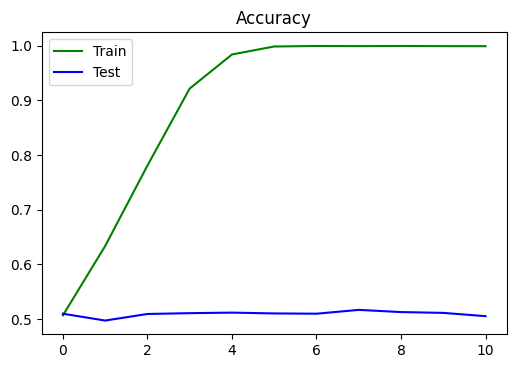

In [24]:
fig = plt.figure(dpi = 100)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color = "g", label = "Train")
plt.plot(history.history["val_accuracy"], color = "b", label = "Test")
plt.legend(loc = "best")
plt.savefig('accuracyCnn.png')

### Plotiing the loss graph

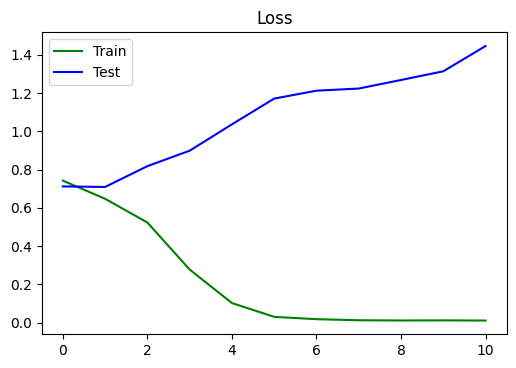

In [25]:
# Plotting the loss graph
fig = plt.figure(dpi = 100)
plt.title("Loss")
plt.plot(history.history["loss"], color = "g", label = "Train")
plt.plot(history.history["val_loss"], color = "b", label = "Test")
plt.legend(loc = "best")
plt.savefig('graphs/lossCnn.png')

### Tune hyperparameters 
Now, it is time to tweak hyperparameters to imporve accuracy over validation set.

In [27]:
from sklearn.model_selection import ParameterGrid
# Set the hyperparameters
filters = [256] #[64, 128, 256]
kernel_size = [7] #[3, 5, 7]
strides= [1] # [1, 2, 5]
Dense_units = [128, 512]
kernel_initializer = ['TruncatedNormal'] #['zero', 'glorot_uniform', 'glorot_normal','TruncatedNormal']
rate_dropouts = [0.25] #[0.1, 0.25, 0.5]
optimizers = ['adam'] #['adam','rmsprop']
epochs = [11]
batches = [64] #[32, 64, 128]
# ----------------------------------------------
# Exhaustive Grid Search
param_grid = dict(optimizer = optimizers, epochs = epochs, batch_size = batches,
                  filters = filters, kernel_size = kernel_size, strides = strides, 
                  units = Dense_units, kernel_initializer= kernel_initializer, rate = rate_dropouts)

grid = ParameterGrid(param_grid)
param_sets = list(grid)

param_scores = []
for params in grid:

    print(params)
    model.set_params(**params)

    earlystopper = EarlyStopping(monitor = 'val_acc', patience = 0, verbose = 1)
    
    history = model.fit(X_train, y_train,
                        shuffle= True,
                        validation_data=(X_val, y_val),
                        callbacks= [earlystopper])

    param_score = history.history['val_acc']
    param_scores.append(param_score[-1])
    print('+-'*50) 

print('param_scores:', param_scores)
print("best score:", param_scores[p])

# Choose best parameters
p = np.argmax(np.array(param_scores))
best_params = param_sets[p]
print("Best parameter set", best_params)

{'batch_size': 64, 'epochs': 11, 'filters': 256, 'kernel_initializer': 'TruncatedNormal', 'kernel_size': 7, 'optimizer': 'adam', 'rate': 0.25, 'strides': 1, 'units': 128}


AttributeError: 'Sequential' object has no attribute 'set_params'